In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/df_tweets.csv')

In [ ]:
# df = pd.read_pickle('df_tweets.pkl')
df.columns = df.columns.astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118355 entries, 0 to 118354
Columns: 1636 entries, Unnamed: 0 to 999
dtypes: float64(635), int64(1001)
memory usage: 1.4 GB


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df, test_size=0.95, random_state=42)

In [ ]:
# get a smaller sample ~ 5.9K tweets
len(X_train)

5917

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components='mle', svd_solver='full')
X_pca = pd.DataFrame(pca.fit_transform(X_train))
X_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5917 entries, 0 to 5916
Columns: 1503 entries, 0 to 1502
dtypes: float64(1503)
memory usage: 67.9 MB


Text(0.5, 1.0, 'Projection of the clustering on a the axis of the PCA')

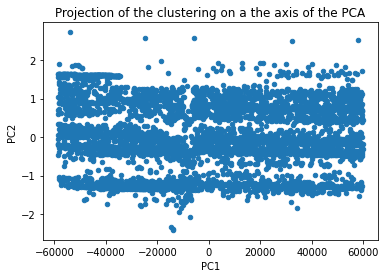

In [ ]:
ax = X_pca.plot(kind='scatter', x=0, y=1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Projection of the clustering on the axis of the PCA')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward', compute_full_tree=True, compute_distances=True)
agg.fit_predict(X_train)

array([2, 0, 2, ..., 0, 2, 2])

In [ ]:
# model performance metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
print("Silhouette Coefficient: %0.3f" % silhouette_score(X_train, agg.labels_))
print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(X_train, agg.labels_))
print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(X_train, agg.labels_))

Silhouette Coefficient: 0.539
Calinski-Harabasz Index: 33280.976
Davies-Bouldin Index: 0.507


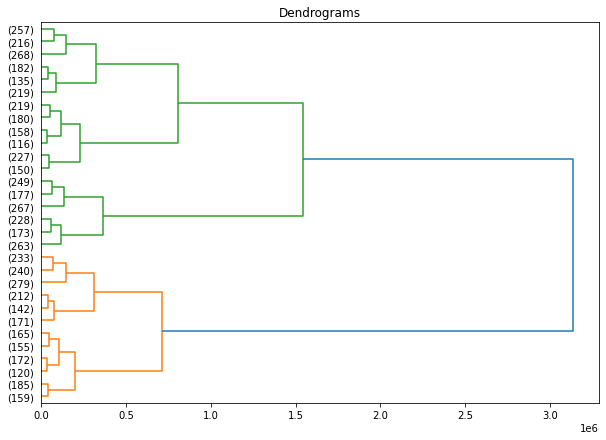

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title('Dendrograms')
ded = shc.dendrogram(shc.linkage(X_train, method='ward'), truncate_mode='lastp', orientation='right')